# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_excel('GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [3]:
df.size

3000

In [4]:
df.shape

(1000, 3)

In [5]:
#df.set_index(np.arange(1,1001),inplace=True)
#df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Creditability             1000 non-null   int64
 1   CreditAmount              1000 non-null   int64
 2   DurationOfCreditInMonths  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


# 3. Plot Histogram for column 'CreditAmount'

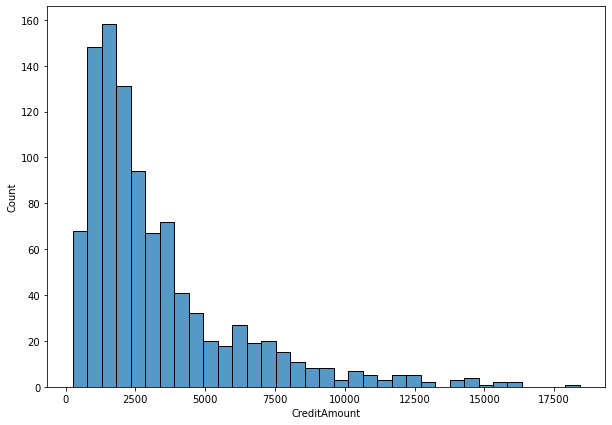

In [7]:
plt.figure(figsize=(10,7))
sns.histplot(df['CreditAmount'])
plt.show()

# 3b. Create creditability dataframe

In [8]:
ca=pd.DataFrame(df['Creditability'])
ca.head()

,Creditability
0,1
1,1
2,1
3,1
4,1


In [9]:
df=df.drop(columns='Creditability')
df.head()

,CreditAmount,DurationOfCreditInMonths
0,1049,18
1,2799,9
2,841,12
3,2122,12
4,2171,12


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [10]:
df_concat=pd.concat([df,ca],axis=1)
df_concat.head()

,CreditAmount,DurationOfCreditInMonths,Creditability
0,1049,18,1
1,2799,9,1
2,841,12,1
3,2122,12,1
4,2171,12,1


In [11]:
df_concat['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

<AxesSubplot:xlabel='Creditability', ylabel='count'>

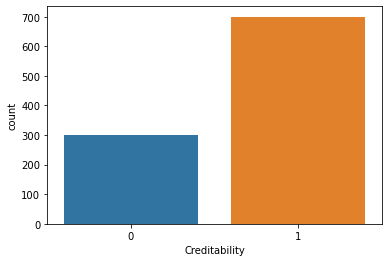

In [12]:
sns.countplot(df_concat['Creditability'])

# 6. Prepare input data for the model

In [13]:
x=df_concat.drop(columns=['Creditability'],axis=1)
y=df_concat['Creditability']

In [14]:
ss=StandardScaler()
x_scaled=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x_scaled.head()

,CreditAmount,DurationOfCreditInMonths
0,-0.787657,-0.240857
1,-0.167384,-0.987573
2,-0.861381,-0.738668
3,-0.407341,-0.738668
4,-0.389974,-0.738668


In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,random_state=10,test_size=0.3)

# 7. Fit logistic regression model

In [16]:
xc=sm.add_constant(xtrain)
logit=sm.Logit(ytrain,xc).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.575767
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Creditability   No. Observations:                  700
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            2
Date:                Sun, 21 Nov 2021   Pseudo R-squ.:                 0.04177
Time:                        14:04:17   Log-Likelihood:                -403.04
converged:                       True   LL-Null:                       -420.61
Covariance Type:            nonrobust   LLR p-value:                 2.339e-08
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.9213      0.086     10.699      0.000       0.753       1.090
CreditAmount                -0.1515      0.105     -1.447      0.148      -0.357       0.054
DurationOfCreditInMonths    -0.3826      0.106     -3.600      0.000      -0.591      -0.174
============================================================================================
"""

In [17]:
log_reg = LogisticRegression()  # constant will be added automatically
log_reg.fit(xtrain,ytrain)

LogisticRegression()

In [18]:
y_predic_proba = log_reg.predict_proba(xtest)
y_predic_proba.round(2)

array([[0.25, 0.75],
       [0.28, 0.72],
       [0.18, 0.82],
       [0.29, 0.71],
       [0.38, 0.62],
       [0.25, 0.75],
       [0.42, 0.58],
       [0.28, 0.72],
       [0.38, 0.62],
       [0.41, 0.59],
       [0.18, 0.82],
       [0.23, 0.77],
       [0.4 , 0.6 ],
       [0.21, 0.79],
       [0.18, 0.82],
       [0.33, 0.67],
       [0.32, 0.68],
       [0.23, 0.77],
       [0.25, 0.75],
       [0.27, 0.73],
       [0.51, 0.49],
       [0.29, 0.71],
       [0.3 , 0.7 ],
       [0.58, 0.42],
       [0.19, 0.81],
       [0.23, 0.77],
       [0.39, 0.61],
       [0.28, 0.72],
       [0.21, 0.79],
       [0.26, 0.74],
       [0.29, 0.71],
       [0.49, 0.51],
       [0.3 , 0.7 ],
       [0.21, 0.79],
       [0.24, 0.76],
       [0.23, 0.77],
       [0.28, 0.72],
       [0.23, 0.77],
       [0.3 , 0.7 ],
       [0.57, 0.43],
       [0.21, 0.79],
       [0.18, 0.82],
       [0.25, 0.75],
       [0.28, 0.72],
       [0.22, 0.78],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.23,

In [19]:
y_predic = log_reg.predict(xtest)
y_predic

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

# 8. Build a confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

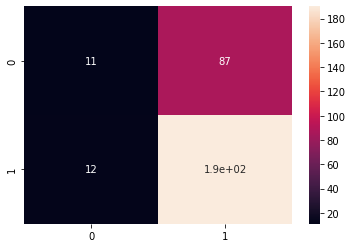

In [21]:
y_act = ytest  # True o/p
y_pred = y_predic # model o/p
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True)

In [22]:
cnf_mat = confusion_matrix(y_act,y_pred)
tn = cnf_mat[0,0]
tp = cnf_mat[1,1]
fp = cnf_mat[0,1]
fn = cnf_mat[1,0]
tn,tp,fp,fn

(11, 190, 87, 12)

# 9. Test accuracy calculation

In [23]:
acc = (tn+tp)/(tn+tp+fn+fp)
acc

0.67

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [24]:
from sklearn.metrics import classification_report

print(classification_report(ytest,y_predic))

              precision    recall  f1-score   support

           0       0.48      0.11      0.18        98
           1       0.69      0.94      0.79       202

    accuracy                           0.67       300
   macro avg       0.58      0.53      0.49       300
weighted avg       0.62      0.67      0.59       300



In [25]:
prob = log_reg.predict_proba(xtest)
prob = prob[:,1]

In [26]:
fpr,tpr,thres = roc_curve(ytest,prob)
df = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
df

,TPR,FPR,Threshold
0,0.000000,0.000000,1.824382
1,0.004950,0.000000,0.824382
2,0.069307,0.000000,0.818116
3,0.069307,0.010204,0.817883
4,0.123762,0.010204,0.809559
5,0.123762,0.020408,0.807232
6,0.128713,0.020408,0.806854
7,0.128713,0.030612,0.805427
8,0.138614,0.030612,0.803174
9,0.138614,0.051020,0.798012


Text(0.5, 1.0, 'ROC Curve')

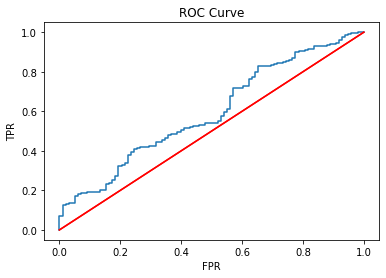

In [27]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [28]:
roc_auc_score(ytest,prob)  # area under the curve

0.594059405940594